<div class="frontmatter text-center">
<h2> MATH5027 Scientific Python, Fall 2017</h2>
<h2> Homework 6, Due: Tuesday October 31st, 6:00pm </h2>
</div>

Instructions: complete the selection of exercises from the week's class notebooks. Use markdown cells between code examples to explain.

# Questions 

## Class 9
Recall we have two csvs: passengers that we know survived or perished, a new data on passengers without survival information. Predict the chances of survival of these new data points using their age, sex, and pclass. Specifically:

First using the old data:

1) bin the age variable into 3 groups (young, middle-aged, old),

2) calculate the average rate of survival for people in each age/sex/pclass group, 

Then on the new data:

3) infer the chance of survival of each of the new passengers using these averages.

4) plot a histogram of the estimated survivial chances for the new passengers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Class 9

1) bin the age variable into 3 groups (young, middle-aged, old)

In [15]:
df=pd.read_csv('titanic.csv',header=0,sep=',')

In [16]:
bins = [0, 25, 55, 100]
label_names = ["young", "middle-aged", "old"]
df["age_group"] = pd.cut(df["Age"], bins, labels = label_names)

2 ) calculate the average rate of survival for people in each age/sex/pclass group

In [17]:
surv = pd.DataFrame(df.groupby(["Pclass","Sex","age_group"])["Survived"].mean())
surv

Survived
Pclass Sex    age_group            
1      female middle-aged  0.980000
              old          1.000000
              young        0.928571
       male   middle-aged  0.441176
              old          0.157895
              young        0.500000
2      female middle-aged  0.909091
              old          0.000000
              young        0.965517
       male   middle-aged  0.070175
              old          0.166667
              young        0.277778
3      female middle-aged  0.361111
              old          1.000000
              young        0.507692
       male   middle-aged  0.152542
              old          0.000000
              young        0.155039

3) infer the chance of survival of each of the new passengers using these averages.

In [18]:
surv.reset_index(level=surv.index.names, inplace=True)

In [19]:
df2= pd.read_csv('titanic2.csv')

In [20]:
df2["age_group"] = pd.cut(df["Age"], bins, labels = label_names)

In [21]:
df2full = pd.merge(df2, surv, how = "outer")

In [22]:
df2full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,young,0.155039
1,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,young,0.155039
2,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,young,0.155039
3,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C,NaN,0.155039
4,919,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C,young,0.155039


4) plot a histogram of the estimated survivial chances for the new passengers

In [43]:
tix = [x / 10 for x in range(0,11)]
tix

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

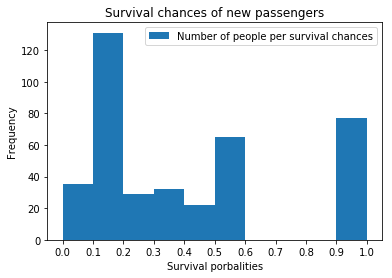

In [42]:
ax=df2full.plot(kind='hist',y='Survived', label = "Number of people per survival chances")
ax.set_title('Survival chances of new passengers');
ax.set_xlabel("Survival porbalities")
ax.set_xticks(tix)
plt.show()

## Class 10
Using the Divvy Bike data...

1) Write a function that rounds each start time to the nearest half hour and add such columns to our dataframe as starthalfhour and endhalfhour.

2) Use the datetime library's .dayofweek method to add the day of the week (i.e. Monday, Tuesday,...) to the dataframe for each trip.

3) Groupby day of the week and hours and count the number of trips. Use the unstack method on the grouped frame and plot the result.

4) Investigate the relationship between station capacity and traffic. Which two stations would you expand if you had the budget? 

5) Which stations are sources and which stations are sinks? i.e. which stations have much more departures than arrivals, and vice versa. Replot the geographic locations of the stations and using color or size visualize which stations are sources and sinks. Repeat the exercise for only weekday and only weekend trips. Do you see a difference?

## Class 10
1) Write a function that rounds each start time to the nearest half hour and add such columns to our dataframe as starthalfhour and endhalfhour.

In [113]:
trips=pd.read_csv('divvy_trips_august_2013.csv')

C:\Users\peter\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
trips.starttime= pd.to_datetime(trips.starttime,format="%Y-%m-%d %H:%M")
trips.stoptime= pd.to_datetime(trips.stoptime,format="%m/%d/%Y %H:%M")

In [115]:
from datetime import timedelta
def round_halfhour(dt, mins=30):
    """
    Rounds a datetime object to its nearest hour (by default).
    (e.g. 2014-02-01 10:45:13 becomes 2014-02-01 11:00:00)
    """
    dt += timedelta(minutes=mins/2.)
    dt -= timedelta(minutes=dt.minute % mins, seconds=dt.second)
    return dt

In [116]:
trips['starthalfhour'] = trips.starttime.apply(round_halfhour)
trips['stophalfhour'] = trips.stoptime.apply(round_halfhour)

In [65]:
trips[["starttime", "starthalfhour", "stoptime", "stophalfhour"]].head(20)

,starttime,starthalfhour,stoptime,stophalfhour
0,2013-08-01 00:13:00,2013-08-01 00:00:00,2013-08-01 00:28:00,2013-08-01 00:30:00
1,2013-08-01 00:28:00,2013-08-01 00:30:00,2013-08-01 00:41:00,2013-08-01 00:30:00
2,2013-08-01 00:57:00,2013-08-01 01:00:00,2013-08-01 03:42:00,2013-08-01 03:30:00
3,2013-08-01 00:57:00,2013-08-01 01:00:00,2013-08-01 03:43:00,2013-08-01 03:30:00
4,2013-08-01 00:58:00,2013-08-01 01:00:00,2013-08-01 02:32:00,2013-08-01 02:30:00
5,2013-08-01 00:58:00,2013-08-01 01:00:00,2013-08-01 02:32:00,2013-08-01 02:30:00
6,2013-08-01 01:22:00,2013-08-01 01:30:00,2013-08-01 01:30:00,2013-08-01 01:30:00
7,2013-08-01 01:25:00,2013-08-01 01:30:00,2013-08-01 01:44:00,2013-08-01 01:30:00
8,2013-08-01 01:25:00,2013-08-01 01:30:00,2013-08-01 01:44:00,2013-08-01 01:30:00
9,2013-08-01 01:28:00,2013-08-01 01:30:00,2013-08-01 01:44:00,2013-08-01 01:30:00


2) Use the datetime library's .dayofweek method to add the day of the week (i.e. Monday, Tuesday,...) to the dataframe for each trip.

In [117]:
trips["day_of_the_week"] = trips.starttime.dt.dayofweek
trips.head(5)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starthalfhour,stophalfhour,day_of_the_week
0,134677,2013-08-01 00:13:00,2013-08-01 00:28:00,135,864,42.0,Michigan Ave & Oak St,44.0,Ogden Ave & Chicago Ave,Customer,NaN,NaN,2013-08-01 00:00:00,2013-08-01 00:30:00,3
1,134679,2013-08-01 00:28:00,2013-08-01 00:41:00,135,767,44.0,Ogden Ave & Chicago Ave,NaN,Congress Pkwy & Ogden Ave,Customer,NaN,NaN,2013-08-01 00:30:00,2013-08-01 00:30:00,3
2,134682,2013-08-01 00:57:00,2013-08-01 03:42:00,183,9920,337.0,Lake Shore Dr & Ohio St,43.0,Michigan Ave & Lake St,Customer,NaN,NaN,2013-08-01 01:00:00,2013-08-01 03:30:00,3
3,134683,2013-08-01 00:57:00,2013-08-01 03:43:00,512,9931,337.0,Lake Shore Dr & Ohio St,309.0,Indiana Ave & Roosevelt Rd,Customer,NaN,NaN,2013-08-01 01:00:00,2013-08-01 03:30:00,3
4,134684,2013-08-01 00:58:00,2013-08-01 02:32:00,656,5678,68.0,Western Ave & Winnebago Ave,68.0,Western Ave & Winnebago Ave,Customer,NaN,NaN,2013-08-01 01:00:00,2013-08-01 02:30:00,3


3) Groupby day of the week and hours and count the number of trips. Use the unstack method on the grouped frame and plot the result.

In [76]:
# As I see it, this is one of the examples for which the solution has already been provided.

weekdays = trips['starttime'].apply(lambda d: d.dayofweek)
hours = trips['starttime'].apply(lambda d: d.hour)
by_weekday_hour = trips.groupby([weekdays, hours])['trip_id'].count()
by_weekday_hour.index.names = ['weekday', 'hour'] # rename MultiIndex

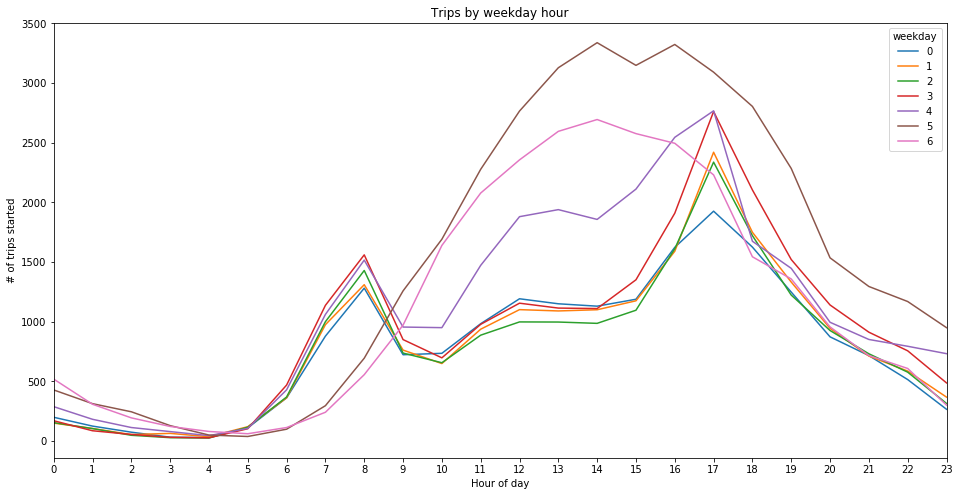

In [77]:
by_weekday_hour.unstack(0).plot(figsize=(16,8))
plt.title('Trips by weekday hour')
plt.ylabel('# of trips started')
plt.xlabel('Hour of day')
plt.xticks(range(24))
plt.xlim(0, 23);
plt.show()

4) Investigate the relationship between station capacity and traffic. Which two stations would you expand if you had the budget?

In [118]:
stations = pd.read_csv('Divvy_Stations_2013.csv')

In [119]:
stations.head(5)

,name,latitude,longitude,dpcapacity
0,State St & Harrison St,41.873958,-87.627739,19
1,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19
2,Morgan St & 18th St,41.858086,-87.651073,15
3,Racine Ave & 18th St,41.858181,-87.656487,15
4,Wood St & North Ave,41.910329,-87.672516,15


In [120]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,starthalfhour,stophalfhour,day_of_the_week
0,134677,2013-08-01 00:13:00,2013-08-01 00:28:00,135,864,42.0,Michigan Ave & Oak St,44.0,Ogden Ave & Chicago Ave,Customer,NaN,NaN,2013-08-01 00:00:00,2013-08-01 00:30:00,3
1,134679,2013-08-01 00:28:00,2013-08-01 00:41:00,135,767,44.0,Ogden Ave & Chicago Ave,NaN,Congress Pkwy & Ogden Ave,Customer,NaN,NaN,2013-08-01 00:30:00,2013-08-01 00:30:00,3
2,134682,2013-08-01 00:57:00,2013-08-01 03:42:00,183,9920,337.0,Lake Shore Dr & Ohio St,43.0,Michigan Ave & Lake St,Customer,NaN,NaN,2013-08-01 01:00:00,2013-08-01 03:30:00,3
3,134683,2013-08-01 00:57:00,2013-08-01 03:43:00,512,9931,337.0,Lake Shore Dr & Ohio St,309.0,Indiana Ave & Roosevelt Rd,Customer,NaN,NaN,2013-08-01 01:00:00,2013-08-01 03:30:00,3
4,134684,2013-08-01 00:58:00,2013-08-01 02:32:00,656,5678,68.0,Western Ave & Winnebago Ave,68.0,Western Ave & Winnebago Ave,Customer,NaN,NaN,2013-08-01 01:00:00,2013-08-01 02:30:00,3


In [121]:
print(trips.columns)
print(stations.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'starthalfhour',
       'stophalfhour', 'day_of_the_week'],
      dtype='object')
Index(['name', 'latitude', 'longitude', 'dpcapacity'], dtype='object')


In [122]:
trips = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')


In [123]:
trips.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'starthalfhour',
       'stophalfhour', 'day_of_the_week', 'name', 'latitude', 'longitude',
       'dpcapacity'],
      dtype='object')

In [124]:
caputil = trips.groupby(["from_station_id"]).agg({"trip_id": np.sum, "dpcapacity": np.mean})
caputil = pd.DataFrame(caputil)
caputil.reset_index(level=caputil.index.names, inplace=True)
caputil = caputil.rename(columns={'trip_id': 'trips_started', 'dpcapacity': 'capacity'})
caputil.head(5)

,trips_started,capacity
0,620054072,43
1,397856862,27
2,396592868,27
3,410948581,15
4,394753377,31


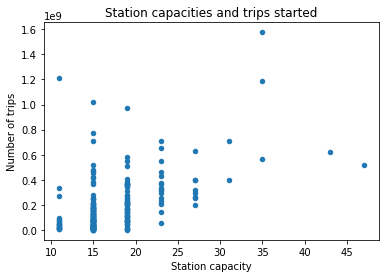

In [12]:
ax=caputil.plot.scatter(x = "capacity",y='trips_started')
ax.set_title('Station capacities and trips started');
ax.set_xlabel("Station capacity")
ax.set_ylabel("Number of trips")
plt.show()

In [13]:
caputil["tripspercap"] = caputil["trips_started"] / caputil["capacity"]

In [14]:
caputil.sort_values("tripspercap", ascending=False)


,trips_started,capacity,tripspercap
180,1211580292,11,1.101437e+08
33,1023355649,15,6.822371e+07
83,775969822,15,5.173132e+07
23,970199731,19,5.106314e+07
199,711718719,15,4.744791e+07
18,1576603099,35,4.504580e+07
32,517217731,15,3.448118e+07
6,1184471371,35,3.384204e+07
39,478095841,15,3.187306e+07
81,469102415,15,3.127349e+07


**Answer**: station 180 and 33 should see some capacity additions.

5) Which stations are sources and which stations are sinks? i.e. which stations have much more departures than arrivals, and vice versa. Replot the geographic locations of the stations and using color or size visualize which stations are sources and sinks. Repeat the exercise for only weekday and only weekend trips. Do you see a difference?

In [15]:
trips.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'starthalfhour',
       'stophalfhour', 'day_of_the_week', 'name', 'latitude', 'longitude',
       'dpcapacity'],
      dtype='object')

In [32]:
import datetime, time
days = trips["starttime"].max() - trips["starttime"].min()
days = days.days+1
days

31

In [16]:
len(trips.to_station_id.unique())

218

In [48]:
nettrips = trips.groupby(["to_station_name"])['trip_id'].count() / days-trips.groupby(["from_station_name"])['trip_id'].count() / days
#nettrips.reset_index()
nettrips = pd.DataFrame(nettrips)
nettrips["station_name"] = nettrips.index
nettrips.reset_index(level=nettrips.index.names, inplace=True)
nettrips.columns = ['net_trips', 'station_name']
nettrips["source_station"] = nettrips["net_trips"] >= 0

nettrips.head(5)

,net_trips,station_name,source_station
0,-0.774194,900 W Harrison,False
1,-1.161290,Aberdeen St & Jackson Blvd,False
2,2.870968,Aberdeen St & Madison St,True
3,0.129032,Adler Planetarium,True
4,-0.129032,Ashland Ave & 21st St,False


In [36]:
stations.columns

Index(['name', 'latitude', 'longitude', 'dpcapacity'], dtype='object')

In [49]:
dailysinksandsources = pd.merge(stations, nettrips, how='inner', left_on='name', right_on='station_name')

In [50]:
dailysinksandsources.head(5)

,name,latitude,longitude,dpcapacity,net_trips,station_name,source_station
0,State St & Harrison St,41.873958,-87.627739,19,2.935484,State St & Harrison St,True
1,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6.064516,Wilton Ave & Diversey Pkwy,True
2,Morgan St & 18th St,41.858086,-87.651073,15,0.580645,Morgan St & 18th St,True
3,Racine Ave & 18th St,41.858181,-87.656487,15,0.387097,Racine Ave & 18th St,True
4,Wood St & North Ave,41.910329,-87.672516,15,-0.645161,Wood St & North Ave,False


In [71]:
dailysources = dailysinksandsources[dailysinksandsources["source_station"] == True]
dailysinks = dailysinksandsources[dailysinksandsources["source_station"] == False]

In [59]:
dailysources.head(5)

,name,latitude,longitude,dpcapacity,net_trips,station_name,source_station
0,State St & Harrison St,41.873958,-87.627739,19,2.935484,State St & Harrison St,True
1,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6.064516,Wilton Ave & Diversey Pkwy,True
2,Morgan St & 18th St,41.858086,-87.651073,15,0.580645,Morgan St & 18th St,True
3,Racine Ave & 18th St,41.858181,-87.656487,15,0.387097,Racine Ave & 18th St,True
5,Wood St & Division St,41.903320,-87.672730,15,2.483871,Wood St & Division St,True


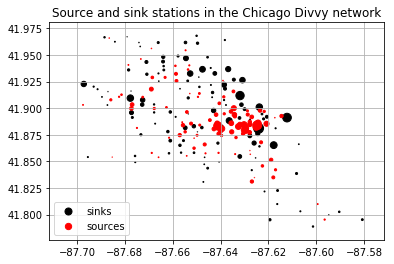

In [127]:
fig, ax = plt.subplots()

ax.scatter(dailysources['longitude'], dailysources['latitude'], s = dailysources['net_trips']*5, c = "k", label = "sinks")
ax.scatter(dailysinks['longitude'], dailysinks['latitude'], s = dailysinks['net_trips']*(-5), c = "r", label = "sources")
ax.grid(True)
plt.legend(loc='lower left')
plt.title("Source and sink stations in the Chicago Divvy network")
plt.show()

In [95]:
trips_weekdays = trips[trips['day_of_the_week'] < 5]
len(trips_weekdays)

106897

In [89]:
nettrips_weekdays = trips_weekdays.groupby(["to_station_name"])['trip_id'].count() / days-trips_weekdays.groupby(["from_station_name"])['trip_id'].count() / days
#nettrips_weekdays.reset_index()
nettrips_weekdays = pd.DataFrame(nettrips_weekdays)
nettrips_weekdays["station_name"] = nettrips_weekdays.index
nettrips_weekdays.reset_index(level=nettrips_weekdays.index.names, inplace=True)
nettrips_weekdays.columns = ['net_trips_weekdays', 'station_name']
nettrips_weekdays["source_station"] = nettrips_weekdays["net_trips_weekdays"] >= 0

In [104]:
weekdaysinksandsources = pd.merge(stations, nettrips_weekdays, how='inner', left_on='name', right_on='station_name')

In [98]:
weekdaysources = weekdaysinksandsources[weekdaysinksandsources["source_station"] == True]
weekdaysinks = weekdaysinksandsources[weekdaysinksandsources["source_station"] == False]

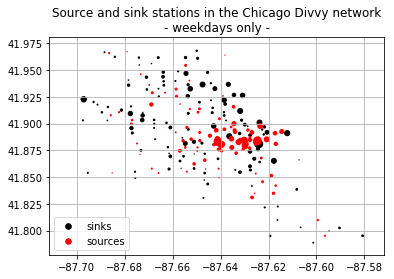

In [128]:
fig, ax = plt.subplots()

ax.scatter(weekdaysources['longitude'], weekdaysources['latitude'], s = weekdaysources['net_trips_weekdays']*5, c = "k", label = "sinks")
ax.scatter(weekdaysinks['longitude'], weekdaysinks['latitude'], s = weekdaysinks['net_trips_weekdays']*(-5), c = "r", label = "sources")
ax.grid(True)
plt.legend(loc='lower left')
plt.title("Source and sink stations in the Chicago Divvy network\n- weekdays only -")
plt.show()

In [94]:
trips_weekends = trips[trips['day_of_the_week'] > 4]
len(trips_weekends)

63611

In [96]:
nettrips_weekends = trips_weekends.groupby(["to_station_name"])['trip_id'].count() / days-trips_weekends.groupby(["from_station_name"])['trip_id'].count() / days
#nettrips_weekends.reset_index()
nettrips_weekends = pd.DataFrame(nettrips_weekends)
nettrips_weekends["station_name"] = nettrips_weekends.index
nettrips_weekends.reset_index(level=nettrips_weekends.index.names, inplace=True)
nettrips_weekends.columns = ['net_trips_weekends', 'station_name']
nettrips_weekends["source_station"] = nettrips_weekends["net_trips_weekends"] >= 0

In [105]:
weekendsinksandsources = pd.merge(stations, nettrips_weekends, how='inner', left_on='name', right_on='station_name')

In [106]:
weekendsources = weekendsinksandsources[weekendsinksandsources["source_station"] == True]
weekendsinks = weekendsinksandsources[weekendsinksandsources["source_station"] == False]

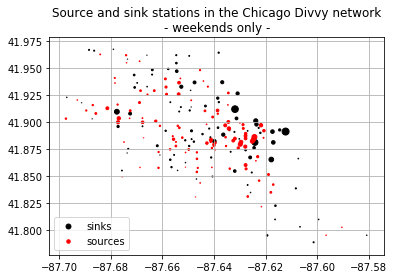

In [129]:
fig, ax = plt.subplots()

ax.scatter(weekendsources['longitude'], weekendsources['latitude'], s = weekendsources['net_trips_weekends']*5, c = "k", label = "sinks")
ax.scatter(weekendsinks['longitude'], weekendsinks['latitude'], s = weekendsinks['net_trips_weekends']*(-5), c = "r", label = "sources")
ax.grid(True)
plt.legend(loc='lower left')
plt.title("Source and sink stations in the Chicago Divvy network\n- weekends only -")
plt.show()

The difference mainly comes in the long(-87.64 - -87.64) lat (41.875 - 41.890) area where you have where the source stations see less negative traffic.

Note: I defined sinks and sources the other way around in the code and I just realized it at the end. I decided to switch the labels and keep the code unchanged. This way the variable names are somehow misleading but it does not affect the visual representations.